_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

chess_df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/chess-transfers/transfers.csv')

In [101]:
chess_df.head()

,url,ID,Federation,Form.Fed,Transfer Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
3,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
4,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00


In [102]:
chess_df['Transfer Date'].count() 
# many of these are duplicate player ID, even the same transfer date.

# cross reference from World Chess Federation
# to note the duplicates are not listed on the site

# https://ratings.fide.com/fedchange.phtml?year=
# examining the years shows a disparity between the created dataframe and the 
# World Chess Federation's listed data

932

In [103]:
# transfer by country
chess_df['Federation'].value_counts()

USA    89
GER    55
CAN    44
ESP    41
RUS    36
FRA    34
CRO    32
BIH    32
TUR    31
CZE    29
AUT    29
SUI    25
MNC    24
AUS    23
ENG    19
SRB    17
UKR    15
ITA    14
BEL    13
SWE    12
AND    11
SCO    10
SIN    10
ROU    10
PLE     9
FIN     9
ISR     9
NOR     9
ARM     9
YUG     8
       ..
JOR     2
BAN     2
EGY     2
JAP     2
BER     2
HON     2
URU     1
LBN     1
LBA     1
MGL     1
MAD     1
ARU     1
MYA     1
PUR     1
MAC     1
VIE     1
TJK     1
HUN     1
CYP     1
TOG     1
KOS     1
QAT     1
ARG     1
GUY     1
DOM     1
ALB     1
ALG     1
TTO     1
KEN     1
MLT     1
Name: Federation, Length: 105, dtype: int64

In [0]:
# Split the duplicate entries into a new dataframe to research

# rename Transfer Date to make it usable below

chess_df.rename(columns={'Transfer Date':'Transfer_Date',
                        'Form.Fed' : 'Former_Fed'}, inplace=True)


#id_dups = chess_df.ID[chess_df.ID.duplicated()].values
transfer_dups = chess_df.Transfer_Date[chess_df.Transfer_Date.duplicated()].values
#former_fed = chess_df.Former_Fed[chess_df.Former_Fed.duplicated()].values

'''
duplicate_transfers = (chess_df[chess_df.ID.isin(id_dups) & 
                                chess_df.Transfer_Date.isin(transfer_dups)
                               & chess_df.Former_Fed.isin(former_fed)])
'''

duplicate_transfers = chess_df[chess_df.Transfer_Date.isin(transfer_dups)]


In [109]:
duplicate_transfers.head(20) 
# note that there are instances of transfer dates being the same, and dup Feds
# for which I have taken into account, but also note the dropped instances are 
# cases like rows 0 and 3, where the data has been duplicated exactly

# simply looking at year 00 you can see every value has a duplicate

,url,ID,Federation,Former_Fed,Transfer_Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
3,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
4,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
5,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
6,https://ratings.fide.com/fedchange.phtml?year=...,6700284,ESA,HON,11/15/01
7,https://ratings.fide.com/fedchange.phtml?year=...,1613782,AUT,ISR,7/9/01
8,https://ratings.fide.com/fedchange.phtml?year=...,2600536,AUS,CAN,11/9/01
9,https://ratings.fide.com/fedchange.phtml?year=...,2603977,CAN,YUG,5/25/01


In [0]:
chess_df = chess_df.drop_duplicates() 
# we want to find unique transfers into countries, so i removed the duplicates
# after confirming them above

In [134]:
chess_df.count()

url              753
ID               753
Federation       753
Former_Fed       749
Transfer_Date    753
dtype: int64

In [0]:
transfer_country_chess = chess_df[['Federation', 'Former_Fed', 'Transfer_Date']].copy()

In [116]:
transfer_country_chess.head()

,Federation,Former_Fed,Transfer_Date
0,USA,PHI,12/15/00
1,BIH,CRO,1/31/00
2,BIH,YUG,1/31/00
6,ESA,HON,11/15/01
7,AUT,ISR,7/9/01


In [0]:
transfered_to_usa = chess_df[chess_df.Federation.isin(['USA'])]



In [118]:
transfered_to_usa.head()

,url,ID,Federation,Former_Fed,Transfer_Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
10,https://ratings.fide.com/fedchange.phtml?year=...,2019523,USA,AZE,3/30/01
14,https://ratings.fide.com/fedchange.phtml?year=...,13601105,USA,GEO,2/13/01
23,https://ratings.fide.com/fedchange.phtml?year=...,2019574,USA,RUS,4/2/01
44,https://ratings.fide.com/fedchange.phtml?year=...,13301918,USA,ARM,3/5/02


In [0]:
# we will use this to create new dataframes of the unique transfers

federation_placeholder = chess_df['Federation'].value_counts(sort=True) 
transfer_placeholder = transfered_to_usa['Former_Fed'].value_counts(sort=True)

# we only want the top 10 in each, transfers into usa only has 10

federation_placeholder_2 = federation_placeholder.head(10)

In [144]:
sorted_usa_transfer = transfer_placeholder.rename_axis('Former_Fed').reset_index(name='Unique_Transfers')

sorted_usa_transfer.head(10)

,Former_Fed,Unique_Transfers
0,IND,10
1,UKR,5
2,CUB,5
3,RUS,4
4,PHI,4
5,ARM,4
6,GEO,3
7,BLR,3
8,AZE,2
9,PER,1


In [0]:
sorted_top_ten_transfers = federation_placeholder_2.rename_axis('Federation').reset_index(name='Total_Transfers')

In [146]:
sorted_top_ten_transfers.head(10) 

,Federation,Total_Transfers
0,USA,66
1,GER,41
2,ESP,32
3,CAN,30
4,CRO,28
5,BIH,28
6,RUS,27
7,FRA,27
8,CZE,26
9,TUR,26


In [0]:
inverse_top_ten = sorted_top_ten_transfers.reindex(index=sorted_top_ten_transfers.index[::-1])


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


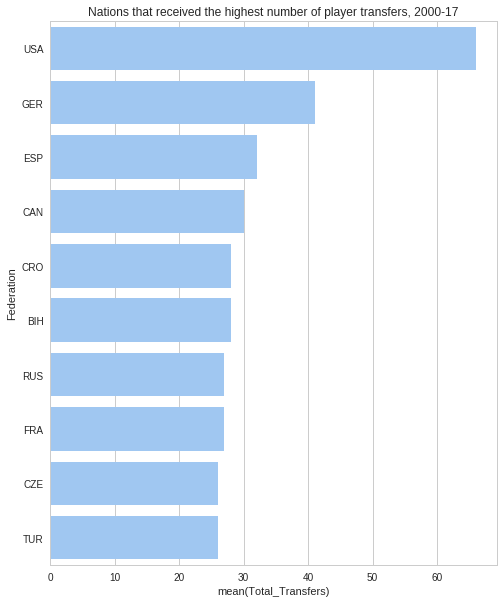

In [167]:
import seaborn as sns

title= 'Nations that received the highest number of player transfers, 2000-17'

sns.set(style="whitegrid")

figure, ax = plt.subplots(figsize=(8, 10))

sns.set_color_codes("pastel")

# seaborn removed my inverse sort. Inverse sort shows in pandas plots, but I'm
# going to assume it sorts from least to most built-in 
# order allows us to plot as desired

sns.barplot(x="Total_Transfers", y="Federation", data=inverse_top_ten,
            color="b", order=["USA", "GER", "ESP", "CAN", "CRO",
  "BIH", "RUS", "FRA", "CZE", "TUR"]).set_title(title);

# TODO : split the incorrect original data and plot alongside to compare